In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
np.random.seed(0)
tf.random.set_seed(0)
from helper import unregularized_model
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

## Implement an unregularized NN 

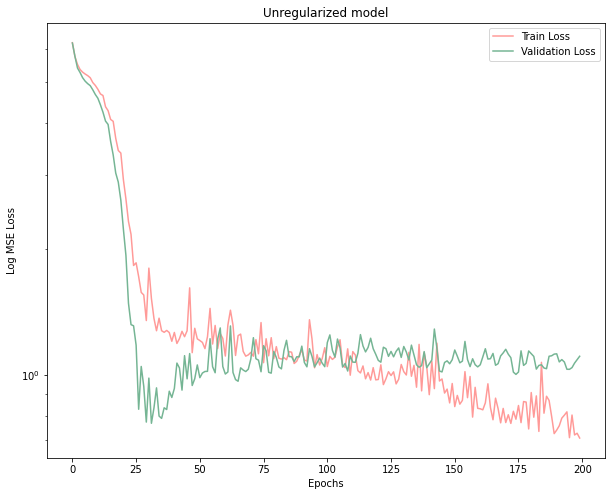

In [2]:
# Call the helper function unregularized_model() to get the 
# unregularized model along with the data
x_b, x_train, x_test, y_train, y_test, y_pred, mse = unregularized_model()

In [3]:
# Printing the MSE of the unregularized model
print("MSE of the unregularized model is", mse)

MSE of the unregularized model is 1.1089915570703672


## Implement the NN with dropouts
For dropout we build the same network with "Dropout" layers after each activation.

In [23]:
model_2 = models.Sequential(name='Dropout_regularized')

# Hidden 5 layer with 100 neurons each (or nodes)
# Add a dropout layer after each hidden layer with some dropout percentage
model_2.add(layers.Dense(100, activation='relu', input_shape=(1,)))
model_2.add(layers.Dropout(0.2))

model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(0.2))

model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(0.2))

model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(0.2))

model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(0.2))

# Output layer with one neuron 
model_2.add(layers.Dense(1,  activation='linear'))


In [24]:
# Compile the model with MSE as loss and Adam optimizer with learning rate as 0.001
opt = optimizers.Adam(lr=0.001)
model_2.compile(optimizer=opt,loss='mean_squared_error',metrics=['mean_squared_error'])
# Save the history about the model after fitting on the train data
# Use 0.2 validation split  with 1500 epochs and batch size of 10
history_2 = model_2.fit(x_train,y_train,batch_size=10,epochs=1500,validation_split=0.2)


Epoch 1/1500
2/2 [==============================] - 1s 178ms/step - loss: 6.9147 - mean_squared_error: 6.9147 - val_loss: 3.1992 - val_mean_squared_error: 3.1992
Epoch 2/1500
2/2 [==============================] - 0s 34ms/step - loss: 6.7118 - mean_squared_error: 6.7118 - val_loss: 3.3086 - val_mean_squared_error: 3.3086
Epoch 3/1500
2/2 [==============================] - 0s 35ms/step - loss: 6.2472 - mean_squared_error: 6.2472 - val_loss: 3.4137 - val_mean_squared_error: 3.4137
Epoch 4/1500
2/2 [==============================] - 0s 49ms/step - loss: 5.9183 - mean_squared_error: 5.9183 - val_loss: 3.5951 - val_mean_squared_error: 3.5951
Epoch 5/1500
2/2 [==============================] - 0s 29ms/step - loss: 5.9589 - mean_squared_error: 5.9589 - val_loss: 3.8084 - val_mean_squared_error: 3.8084
Epoch 6/1500
2/2 [==============================] - 0s 27ms/step - loss: 5.6160 - mean_squared_error: 5.6160 - val_loss: 4.0705 - val_mean_squared_error: 4.0705
Epoch 7/1500
2/2 [===============

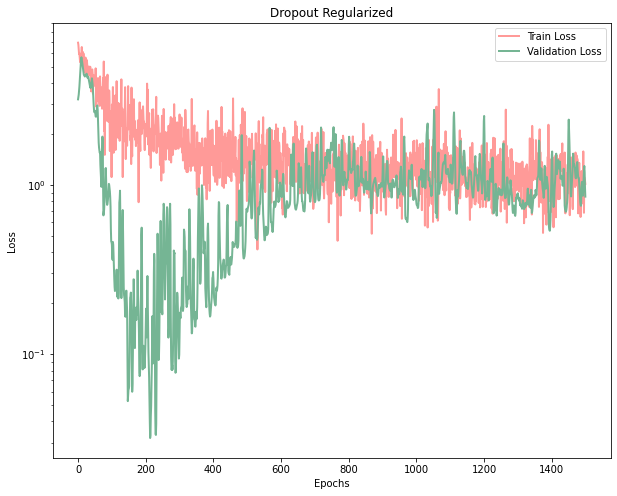

In [25]:
# Helper code to plot the data

# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Dropout Regularized")
plt.semilogy(history_2.history['loss'], label='Train Loss', color='#FF9A98', linewidth=2)
plt.semilogy(history_2.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### ⏸ In the trace plot above, why is the validation error lower than the training error?


#### A. The dropout percentage is high and hence the model is underfit during validation.
#### B. During the validation phase, the validation loss is multiplied by the percentage of dropout, hence the loss is always lower than the training loss.
#### C. The dropout percentage is low and hence the model overfits on the validation data.
#### D. The validation takes place in the evaluation mode of dropout where the weights are already learned.

In [26]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below 
# (eg. if you choose option A, put 'A')
answer1 = 'D'

In [27]:
### edTest(test_mse) ###
# Predict your model on x_b (used exclusively for plotting)
y_hat_dropout = model_2.predict(x_b)

# Predict your model on the test data 
y_dropout_test = model_2.predict(x_test)

# Compute the MSE on the test data
mse_dropout = mean_squared_error(y_test,y_dropout_test)

In [29]:
# Print the MSE of the dropout regularized model
print("MSE of the dropout regularized model is", mse_dropout)

MSE of the dropout regularized model is 1.070669181457642


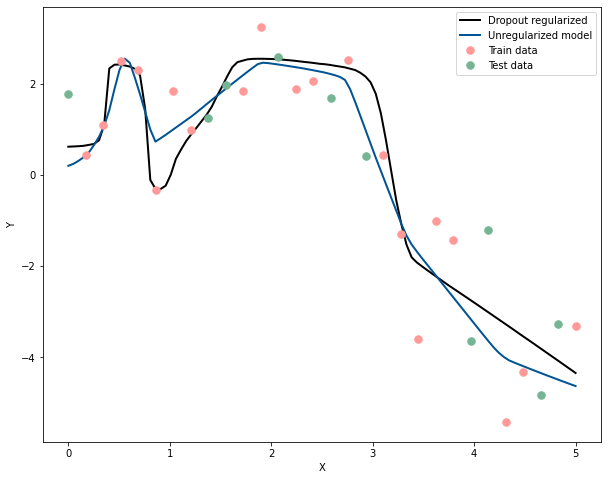

In [28]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_hat_dropout, label='Dropout regularized', color='black', linewidth=2)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train, y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### ⏸ **After marking the exercise, change dropout percentage to 0.8 first and 0.2 next. Do you notice any change? Which value regularizes the neural network more?**

In [30]:
### edTest(test_chow2) ###
# Type your answer within in the quotes given

answer2 = 'The model training speed is much faster, and the model mse 1.441, the validation loss is slowly decreasing\
          and the model underfitting the data, also refelcted in the graph'